In [9]:
import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp as cess
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt
from nltk.tag import hmm
from nltk.tag import tnt
import random
from random import shuffle


[nltk_data] Downloading package cess_esp to /home/oem/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [10]:
oraciones=cess.tagged_sents()
numero=len(oraciones)
print ('Número de oraciones:', numero)
palabras=0;
for s in range (len(oraciones)):
    palabras = palabras + len(oraciones[s])
print ('numero de palabras:', palabras)

Número de oraciones: 6030
numero de palabras: 192685


In [11]:
# Funciones

In [12]:
def procesar(arreglo):
    for pos, palabra in enumerate(arreglo):
        if palabra[0] == '*0*' or palabra[0] == 'sn':
            arreglo.pop(pos)  
    for pos, palabra in enumerate(arreglo):    
        if palabra[1].startswith('v') or palabra[1].startswith('F'):
            arreglo[pos] = ( arreglo[pos][0], palabra[1][:3] ) 
        else:
            arreglo[pos] = ( arreglo[pos][0] , palabra[1][:2] )
    return arreglo

def division(arreglo,porcentaje=0):
    restante = 1-porcentaje
    divide = int(len(arreglo)*restante)
    return (arreglo[:divide] ,  arreglo[divide:])

def barajar1(entrenamiento, division):
    modelo = hmm.HiddenMarkovModelTrainer()
    cuenta = len(entrenamiento)
    rango = int(cuenta/division)
    vector_entrena = []
    vector_prueba = []
    particiones = []

    random.shuffle(entrenamiento)
    recorrido = range(0,cuenta,rango)
    for i in recorrido:
        if i == 0:
            vector_entrena = entrenamiento[i+rango:]
        elif i < rango and i > 0:
            vector_entrena = entrenamiento[:i] + entrenamiento[i+rango:]
        else:
            pass

        vector_prueba = entrenamiento[i:i+rango]

        etiquetador = modelo.train_supervised(vector_entrena)
        particiones.append(etiquetador.evaluate(vector_prueba))

    return particiones

def barajar2(entrenamiento, division):
    modelo = tnt.TnT()
    cuenta = len(entrenamiento)
    rango = int(cuenta/division)
    vector_prueba = []
    vector_entrena = []
    particiones = []

    random.shuffle(entrenamiento)
    recorrido = range(0,cuenta,rango)
    for i in recorrido:
        if i == 0:
            vector_entrena = entrenamiento[i+rango:]
        elif i < rango and i > 0:
            vector_entrena = entrenamiento[:i] + entrenamiento[i+rango:]
        else:
            pass
    
        vector_prueba = entrenamiento[i:i+rango]
    
        modelo.train(vector_entrena)
        particiones.append(modelo.evaluate(vector_prueba))

    return particiones

In [13]:
# Primer punto

In [14]:
original = [(u'*0*', u'sn.e-SUJ'), (u'Era', u'vsii3s0'), (u'el',
u'da0ms0'), (u'sustituto', u'ncms000'), (u'natural', u'aq0cs0'),
(u'de', u'sps00'), (u'Redondo', u'np0000p'), (u',', u'Fc'),
(u'pero', u'cc'), (u'las', u'da0fp0'), (u'discrepancias',
u'ncfp000'), (u'acabaron', u'vmis3p0'), (u'con', u'sps00'),
(u'su', u'dp3cs0'), (u'uni\xf3n', u'ncfs000'), (u'-', u'Fg'),
(u'.', u'Fp')]
resultado = original.copy()

In [15]:
print("Probar bucle: ", procesar(resultado))

Probar bucle:  [('Era', 'vsi'), ('el', 'da'), ('sustituto', 'nc'), ('natural', 'aq'), ('de', 'sp'), ('Redondo', 'np'), (',', 'Fc'), ('pero', 'cc'), ('las', 'da'), ('discrepancias', 'nc'), ('acabaron', 'vmi'), ('con', 'sp'), ('su', 'dp'), ('unión', 'nc'), ('-', 'Fg'), ('.', 'Fp')]


In [17]:
nuevas_oraciones = []
for oracion in oraciones:
    procesada = procesar(oracion)
    nuevas_oraciones.append(procesada)

pruebas, entrenamiento = division(nuevas_oraciones, 0.9)

print("Pruebas: ", len(pruebas))
print("Entrenamiento: ", len(entrenamiento))

Pruebas:  602
Entrenamiento:  5428


In [18]:
# Segundo punto

In [19]:
entrenador = hmm.HiddenMarkovModelTrainer()
etiquetador = entrenador.train_supervised(entrenamiento)
print("Precisión hmm: ", etiquetador.evaluate(pruebas))

Precisión hmm:  0.30886931767636333


In [20]:
etiquetando = tnt.TnT() 
etiquetando.train(entrenamiento) 
print("Precisión tnt: ",  etiquetando.evaluate(pruebas))

Precisión tnt:  0.8963170536429144


In [21]:
# Tercer punto

In [23]:
grafica1 = barajar1(entrenamiento,10)
print(grafica1)

[0.31616577799321377, 0.9896040182221703, 0.9899500406645754, 0.9877563704164077, 0.9891159753295441, 0.9898101534542366, 0.9889944671638201, 0.98940953733286, 0.9881519482105777, 0.9886988204779843, 0.9888475836431226]


In [24]:
grafica2 = barajar2(entrenamiento,10)
print(grafica2)

[0.8943094321462945, 0.9927506090676808, 0.9911049255718262, 0.992016436747872, 0.9922047630739013, 0.992271662763466, 0.9923949708678319, 0.9923100396704303, 0.99216900382444, 0.9930040407695555, 1.0]


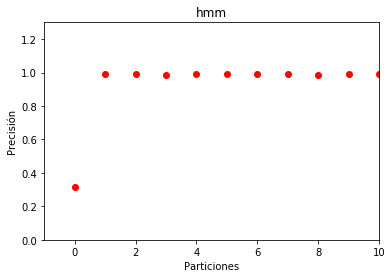

In [30]:
import matplotlib.pyplot as plt
x=[i for i in range(11)]
y=grafica1
plt.axis([-1, 10, 0, 1.3])
plt.ylabel('Precisión')
plt.xlabel('Particiones')
plt.title('hmm')
plt.plot(x,y,'ro')
plt.show()

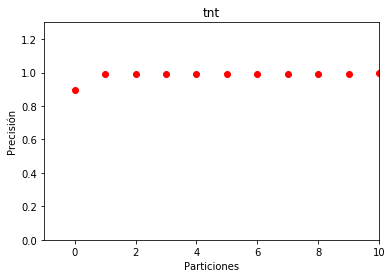

In [31]:
import matplotlib.pyplot as plt
x=[i for i in range(11)]
y=grafica2
plt.axis([-1, 10, 0, 1.3])
plt.ylabel('Precisión')
plt.xlabel('Particiones')
plt.title('tnt')
plt.plot(x,y,'ro')
plt.show()